In [1]:
import sys

import geopandas as gp
import matplotlib.pyplot as plt
import nsp.core
import pandas as pd


In [2]:
GINI_FILE = "../data/Derived/Publication_based/Gini/Normalized/gini_full_1973-2017.csv"
FLAG_TABLE = "../data/Additional_data/country_WoS_ECI_WB_flags.tsv"
WORLD_GEO = "../data/Additional_data/world_map/ne_50m_admin_0_countries.shp"
PLOT_PATH = "test.pdf"

In [3]:
gini_df = pd.read_csv(GINI_FILE)
gini_df.head()

,COUNTRY,GINI
0,Afghanistan,0.779060
1,Albania,0.545270
2,Algeria,0.638580
3,Andorra,0.846437
4,Angola,0.774479


In [4]:
flag_table = pd.read_csv(FLAG_TABLE, sep="\t")
flag_table.head()

,WoS,ECI_Country,WB,Code
0,Albania,Albania,Albania,ALB
1,Algeria,Algeria,Algeria,DZA
2,Angola,Angola,Angola,AGO
3,Argentina,Argentina,Argentina,ARG
4,Australia,Australia,Australia,AUS


In [5]:
world_geo = gp.read_file(WORLD_GEO)[
    ["NAME", "ISO_A3", "geometry", "ADM0_A3", "CONTINENT", "SUBREGION"]
]
world_geo

,NAME,ISO_A3,geometry,ADM0_A3,CONTINENT,SUBREGION
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",ZWE,Africa,Eastern Africa
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",ZMB,Africa,Eastern Africa
2,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",YEM,Asia,Western Asia
3,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",VNM,Asia,South-Eastern Asia
4,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",VEN,South America,South America
...,...,...,...,...,...,...
236,Albania,ALB,"POLYGON ((19.34238 41.86909, 19.34551 41.91885...",ALB,Europe,Southern Europe
237,Afghanistan,AFG,"POLYGON ((66.52227 37.34849, 66.82773 37.37129...",AFG,Asia,Southern Asia
238,Siachen Glacier,-99,"POLYGON ((77.04863 35.10991, 77.00449 35.19634...",KAS,Asia,Southern Asia
239,Antarctica,ATA,"MULTIPOLYGON (((-45.71777 -60.52090, -45.49971...",ATA,Antarctica,Antarctica


In [7]:
gini_merge = gini_df.merge(right=flag_table, left_on="COUNTRY", right_on="WoS").merge(
    how="inner", right=world_geo, left_on="Code", right_on="ADM0_A3"
)
gini_merge.head()

,COUNTRY,GINI,WoS,ECI_Country,WB,Code,NAME,ISO_A3,geometry,ADM0_A3,CONTINENT,SUBREGION
0,Afghanistan,0.779060,Afghanistan,NaN,NaN,AFG,Afghanistan,AFG,"POLYGON ((66.52227 37.34849, 66.82773 37.37129...",AFG,Asia,Southern Asia
1,Albania,0.545270,Albania,Albania,Albania,ALB,Albania,ALB,"POLYGON ((19.34238 41.86909, 19.34551 41.91885...",ALB,Europe,Southern Europe
2,Algeria,0.638580,Algeria,Algeria,Algeria,DZA,Algeria,DZA,"POLYGON ((8.57656 36.93721, 8.59766 36.88389, ...",DZA,Africa,Northern Africa
3,Andorra,0.846437,Andorra,NaN,NaN,AND,Andorra,AND,"POLYGON ((1.70605 42.50332, 1.67852 42.49668, ...",AND,Europe,Southern Europe
4,Angola,0.774479,Angola,Angola,Angola,AGO,Angola,AGO,"MULTIPOLYGON (((13.07275 -4.63477, 13.05732 -4...",AGO,Africa,Middle Africa


In [9]:
gini_merge = gini_merge[gini_merge.CONTINENT != "Antarctica"]
gini_merge["DIVERSITY"] = 1 - gini_merge["GINI"]
world_geo = world_geo[world_geo.CONTINENT != "Antarctica"]
gini_geo = gp.GeoDataFrame(gini_merge)

data_empty = world_geo[~(world_geo["ADM0_A3"].isin(gini_geo["ADM0_A3"]))]

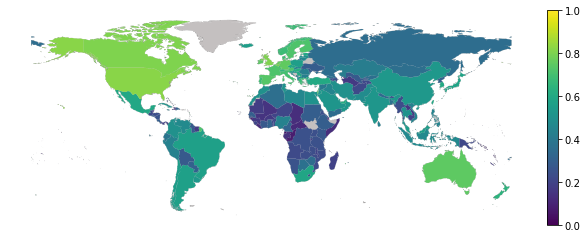

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig, ax = nsp.core.plot_worldmap(
    ax, fig, world_geo, data_empty, gini_geo, "DIVERSITY", cmap="viridis"
)
plt.savefig(PLOT_PATH, format="pdf")

In [ ]:
#